In [ ]:
# Research for project relating to Montreal

In [4]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon

In [3]:
# Define the city name or bounding box
city = 'Montreal, Canada'

# Retrieve the road network graph for driving, walking, and biking
drive_graph = ox.graph_from_place(city, network_type='drive')


# Get the number of nodes and edges for each mode of transportation
drive_nodes_count = len(drive_graph.nodes)
drive_edges_count = len(drive_graph.edges)


# Print the results
print("Drive: Yes")
print("- Number of nodes:", drive_nodes_count)
print("- Number of edges:", drive_edges_count)

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Drive: Yes
- Number of nodes: 19532
- Number of edges: 49023


In [4]:
# Define the city name or bounding box
city = 'Montreal, Canada'

# Retrieve the road network graph for driving, walking, and biking
bike_graph = ox.graph_from_place(city, network_type='bike')

# Get the number of nodes and edges for each mode of transportation
bike_nodes_count = len(bike_graph.nodes)
bike_edges_count = len(bike_graph.edges)

# Print the results
print("Bike: Yes")
print("- Number of nodes:", bike_nodes_count)
print("- Number of edges:", bike_edges_count)

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Bike: Yes
- Number of nodes: 54834
- Number of edges: 138313


In [5]:
# Define the city name or bounding box
city = 'Montreal, Canada'

# Retrieve the road network graph for driving, walking, and biking
walk_graph = ox.graph_from_place(city, network_type='walk')

# Get the number of nodes and edges for each mode of transportation
walk_nodes_count = len(walk_graph.nodes)
walk_edges_count = len(walk_graph.edges)

# Print the results

print("Walk: Yes")
print("- Number of nodes:", walk_nodes_count)
print("- Number of edges:", walk_edges_count)



/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Walk: Yes
- Number of nodes: 144768
- Number of edges: 465390


In [7]:
mon_pois = ox.geometries_from_place(
    "Montreal, Canada", tags={"amenity": True}
)

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/conda/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/opt/conda/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [20]:
len(mon_pois)

25403

In [24]:
len(mon_pois['amenity'].value_counts())

131

In [23]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the full list of value counts for the 'amenity' column
print(mon_pois['amenity'].value_counts())

parking                    4734
bench                      4314
bicycle_parking            3123
restaurant                 1868
waste_basket               1116
parking_space               792
charging_station            777
cafe                        738
fast_food                   577
school                      563
post_box                    460
place_of_worship            453
drinking_water              419
taxi                        350
loading_dock                308
parking_entrance            282
vending_machine             272
bar                         263
bank                        262
social_facility             232
telephone                   223
pharmacy                    222
shelter                     207
toilets                     191
fuel                        179
bicycle_rental              173
dentist                     139
kindergarten                135
childcare                   121
clinic                      120
fountain                    108
pub     

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are depreca

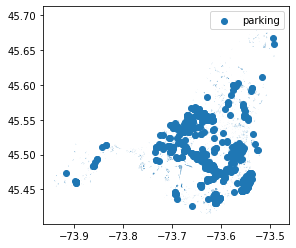

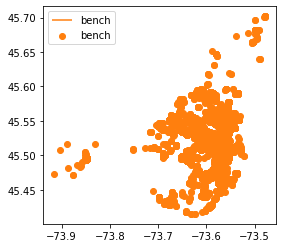

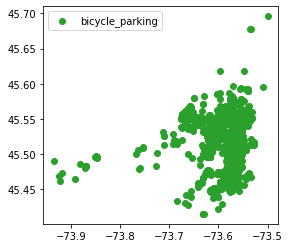

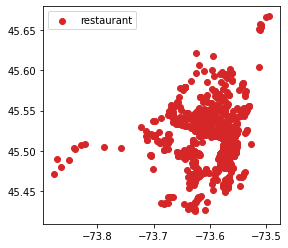

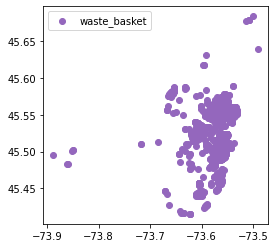

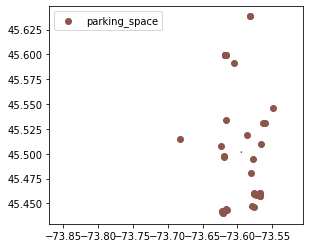

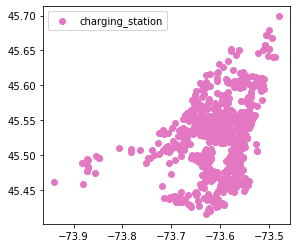

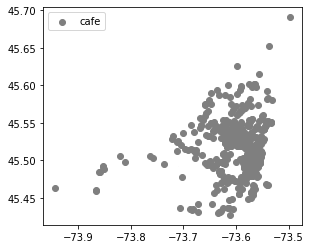

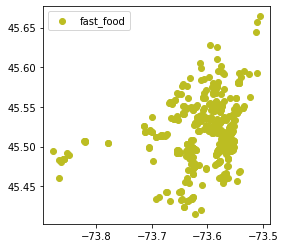

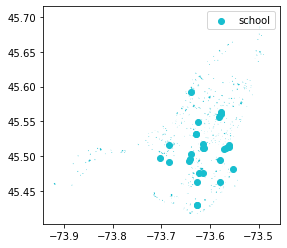

In [8]:
# Assuming 'gdf' is your GeoDataFrame containing POIs and 'amenity_counts' is the counts of each amenity type
amenity_counts = mon_pois['amenity'].value_counts()
N = 10  # Number of top amenities to consider
top_amenities = amenity_counts.head(N).index  # Get the top N amenity types

# Create a color map for different amenities
colors = plt.cm.tab10.colors

# Plot each top amenity type with a different color
for i, amenity_type in enumerate(top_amenities):
    amenity_data = mon_pois[mon_pois['amenity'] == amenity_type]
    amenity_data.plot(color=colors[i], label=amenity_type)
    plt.legend()

plt.show()

In [6]:
mon_pois.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Define the city and retrieve its boundary
city = "Montreal, Canada"
graph = ox.graph_from_place(city)


/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [5]:

# Get neighborhood boundaries
neighborhoods = ox.geometries_from_place(city, tags={"place": "neighbourhood"})

# Save as GeoPackage
neighborhoods.to_file("montreal_neighborhoods.gpkg", driver="GPKG")

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


KeyboardInterrupt: 

In [ ]:
# Read the GeoPackage file
montreal_neighborhoods = gpd.read_file("montreal_neighborhoods.gpkg")

# Plot the neighborhood boundaries
fig, ax = plt.subplots(figsize=(10, 8))
montreal_neighborhoods.plot(ax=ax, edgecolor='black', facecolor='none')
ax.set_title('Montreal Neighborhoods')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
import folium

# Create a map centered around Montreal
montreal_map = folium.Map(location=[45.5017, -73.5673], zoom_start=11)

# Add neighborhood boundaries to the map
for idx, row in montreal_neighborhoods.iterrows():
    folium.GeoJson(row['geometry']).add_to(montreal_map)

# Display the map
montreal_map.save("montreal_neighborhoods_map.html")


In [ ]:
# looking at splitting the city into neighbourhoods

In [4]:
# Define the city of Montreal
city = ox.geocode_to_gdf("Montreal, Canada")

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [5]:
# Get the street network for Montreal
G = ox.graph_from_place("Montreal, Canada", network_type="all")

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [6]:
# Get neighborhood boundaries for Montreal
neighborhoods = ox.geocode_to_gdf("Montreal, Canada")


/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


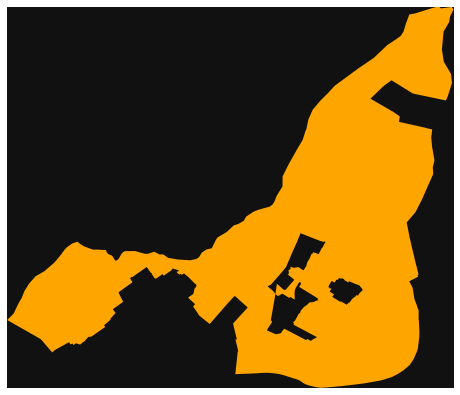

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [8]:
# Plot the neighborhood boundaries
ox.plot_footprints(ox.project_gdf(neighborhoods))


In [8]:


# Create subgraphs for each neighborhood
neighborhood_subgraphs = {}

# Adjust parameters for graph creation
graph_params = {
    "network_type": "drive",  # Consider using a simpler network type if possible
    "clean_periphery": True
}

for index, neighborhood in neighborhoods.iterrows():
    polygon = neighborhood['geometry']
    
    # Simplify the polygon if needed
    simplified_polygon = polygon.simplify(0.001, preserve_topology=False)
    
    # Create a bounding box if needed
    # bounding_box = Polygon(polygon.bounds)
    
    subgraph = ox.graph_from_polygon(simplified_polygon, **graph_params)
    neighborhood_subgraphs[index] = subgraph


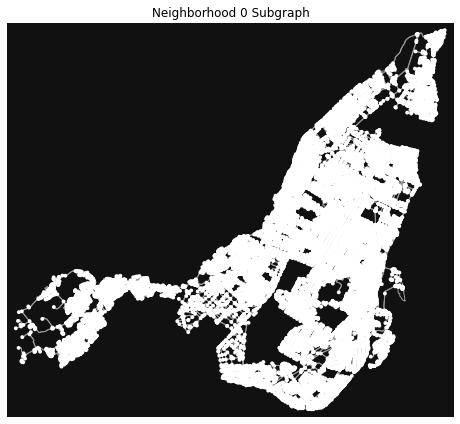

In [9]:
# Iterate through the subgraphs and plot them
for index, subgraph in neighborhood_subgraphs.items():
    fig, ax = ox.plot_graph(subgraph, show=False, close=False)
    ax.set_title(f"Neighborhood {index} Subgraph")
    plt.show()

In [11]:
# Iterate over neighborhoods DataFrame to print out indices and any available information
for index, neighborhood in neighborhoods.iterrows():
    print(f"Neighborhood Index: {index}")
    print(neighborhood)  # Print out the entire row for the neighborhood
    print("\n")


Neighborhood Index: 0
geometry        POLYGON ((-73.9741567 45.4664326, -73.937487 4...
bbox_north                                               45.70479
bbox_south                                              45.410076
bbox_east                                              -73.474295
bbox_west                                              -73.974157
place_id                                                 21186446
osm_type                                                 relation
osm_id                                                    1634158
lat                                                     45.503182
lon                                                    -73.569806
class                                                    boundary
type                                               administrative
place_rank                                                     16
importance                                               0.711736
addresstype                                           

In [12]:
neighborhoods.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-73.97416 45.46643, -73.93749 45.451...",45.70479,45.410076,-73.474295,-73.974157,21186446,relation,1634158,45.503182,-73.569806,boundary,administrative,16,0.711736,city,Montreal,"Montreal, Urban agglomeration of Montreal, Mon..."
